In [11]:
import torch
from convlstm import ConvLSTM
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Clear cuda memory
torch.cuda.empty_cache()

In [12]:
# Input info

"""
Input:
        A tensor of size   (Batch_size, Time_step, Channels Height, Width)   or   (Time_step, Batch_size, Channels, Height, Width)
"""

# Output info

"""
Output:
        A tuple of two lists of length <num_layers> (or length 1 if return_all_layers is False).
            0 - layer_output_list is the list of lists of length T of each output
            1 - last_state_list is the list of last states
                    each element of the list is a tuple (h, c) for hidden state and memory
"""

'\nOutput:\n        A tuple of two lists of length <num_layers> (or length 1 if return_all_layers is False).\n            0 - layer_output_list is the list of lists of length T of each output\n            1 - last_state_list is the list of last states\n                    each element of the list is a tuple (h, c) for hidden state and memory\n'

In [13]:
# Hyperparameters

input_dim = 3             # Number of channels of input tensor - (int)
hidden_dim = 11            # Number of channels of hidden state - (int) --- This will also be the number of hidden states output by the model
kernel_size = (3, 3)       # Kernel size in convolutions
num_layers = 128             # Number of LSTM layers stacked on each other
batch_first = True         # Whether or not dimension 0 is the batch or not
bias = True                # Bias or no bias in Convolution
return_all_layers = False  # Return the list of computations for all layers

In [14]:
# Instantiate model
model = ConvLSTM(input_dim,
                 hidden_dim,
                 kernel_size,
                 num_layers,
                 batch_first,
                 bias,
                 return_all_layers)

model.to('cuda')
model.eval()

#print(model)

ConvLSTM(
  (cell_list): ModuleList(
    (0): ConvLSTMCell(
      (conv): Conv2d(14, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): ConvLSTMCell(
      (conv): Conv2d(22, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (2): ConvLSTMCell(
      (conv): Conv2d(22, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (3): ConvLSTMCell(
      (conv): Conv2d(22, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (4): ConvLSTMCell(
      (conv): Conv2d(22, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (5): ConvLSTMCell(
      (conv): Conv2d(22, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (6): ConvLSTMCell(
      (conv): Conv2d(22, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (7): ConvLSTMCell(
      (conv): Conv2d(22, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (8): ConvLSTMCell(
      (conv): Conv2d(22, 44, kernel_size=(3, 3), stride=(1, 1), padd

In [34]:
# Sample input
batch_size = 17
time_step = 2
channels = 3
height = 10
width = 20

x = torch.rand((batch_size, time_step, channels, height, width)).to('cuda')


In [35]:
t0 = time.time()

with torch.no_grad():
    layer_output_list, last_state_list = model(x)

execution_time = time.time()-t0

print(execution_time)

0.3722701072692871


In [36]:
output = last_state_list[0][0]

In [37]:
output.shape

torch.Size([17, 11, 10, 20])

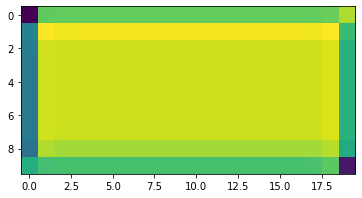

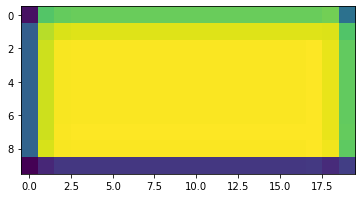

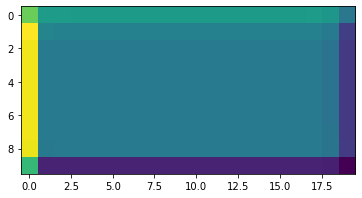

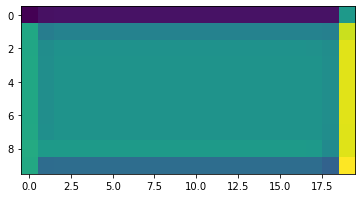

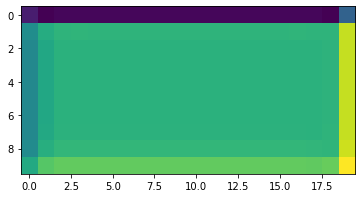

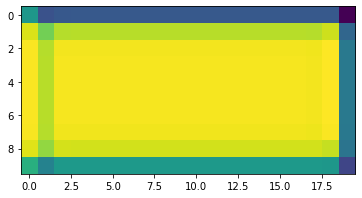

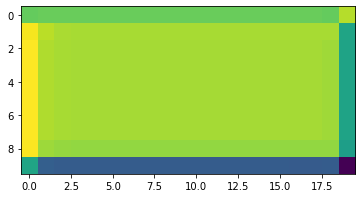

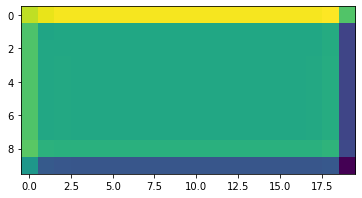

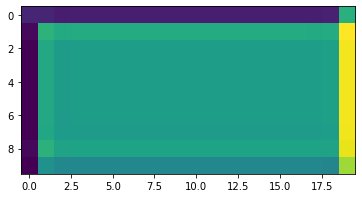

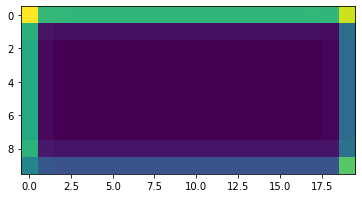

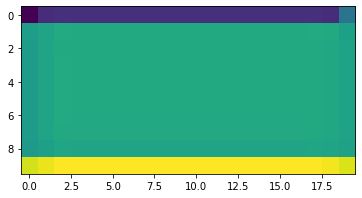

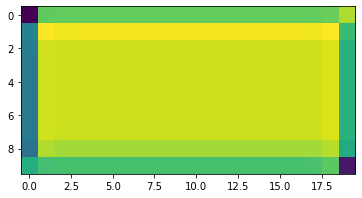

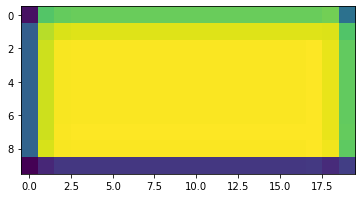

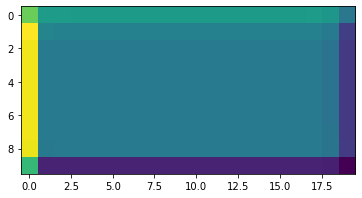

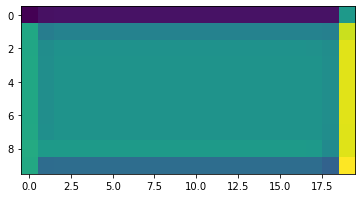

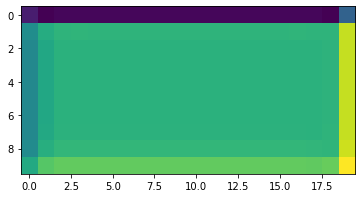

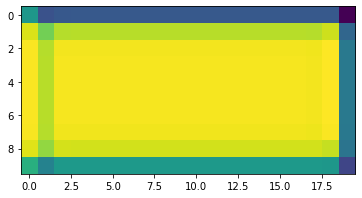

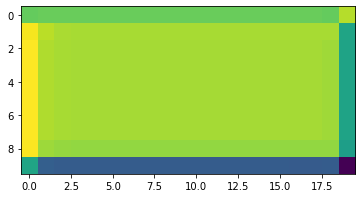

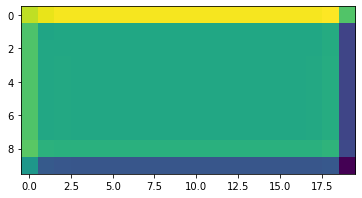

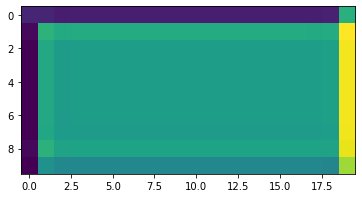

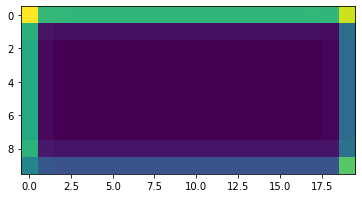

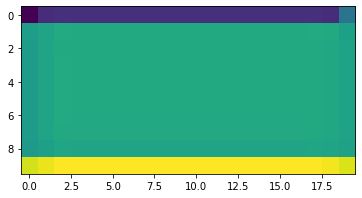

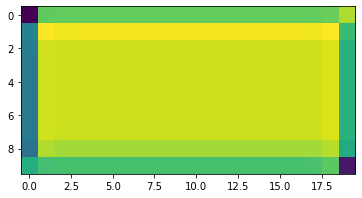

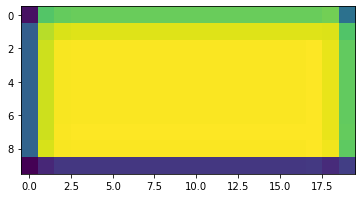

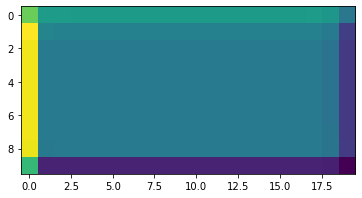

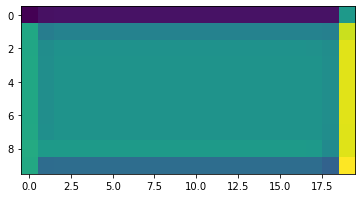

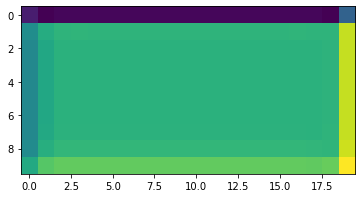

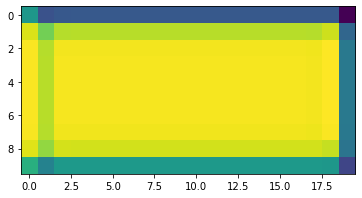

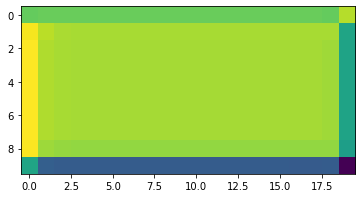

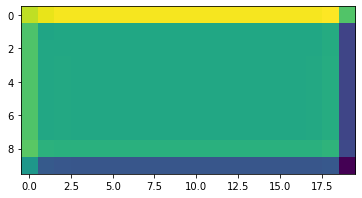

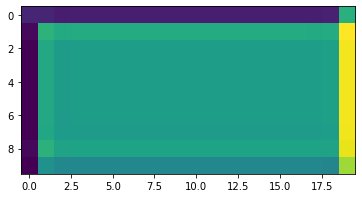

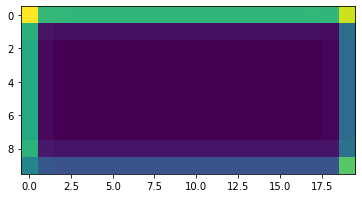

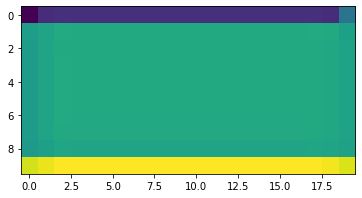

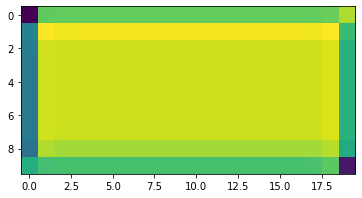

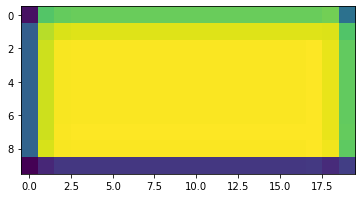

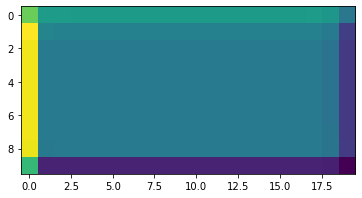

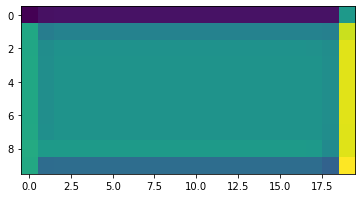

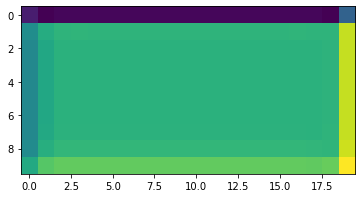

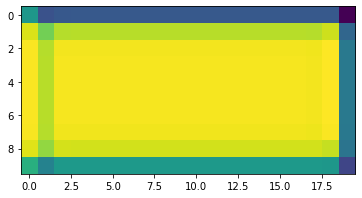

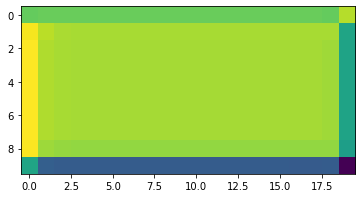

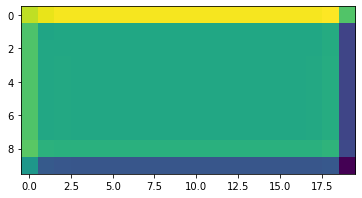

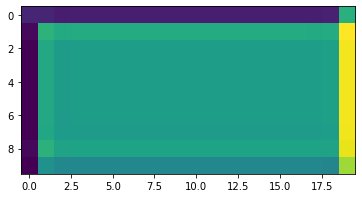

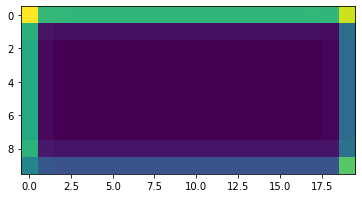

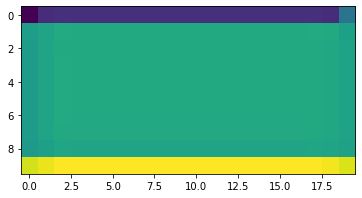

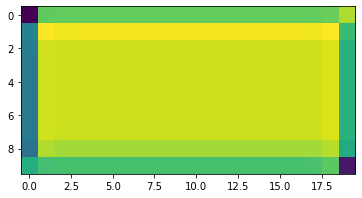

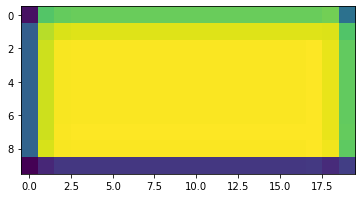

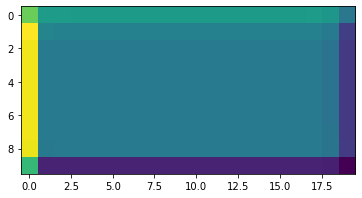

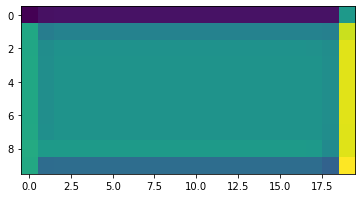

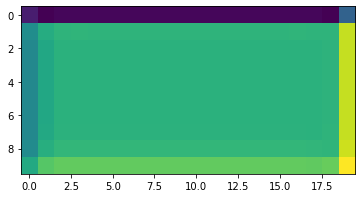

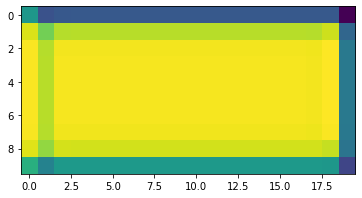

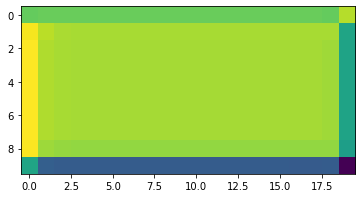

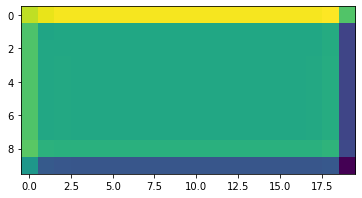

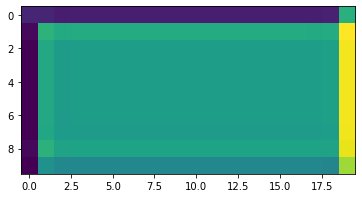

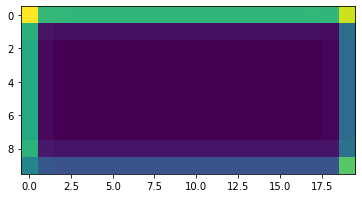

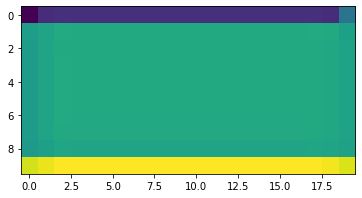

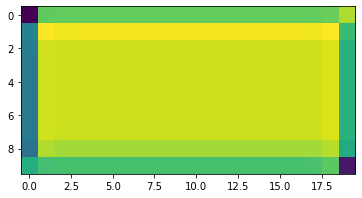

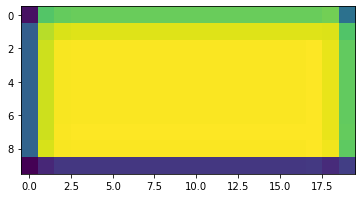

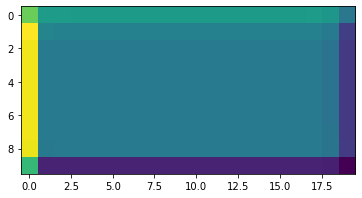

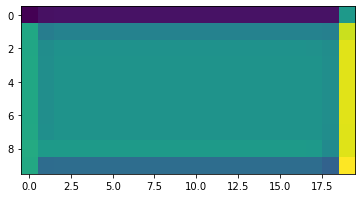

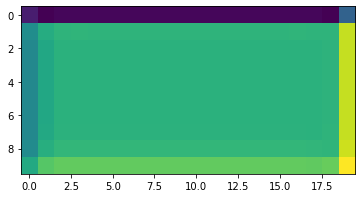

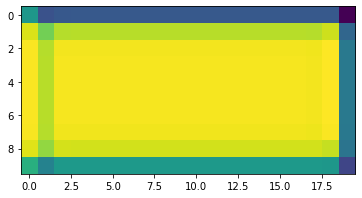

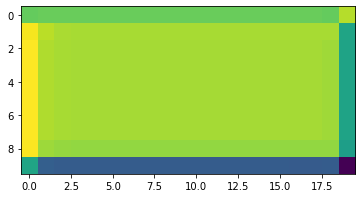

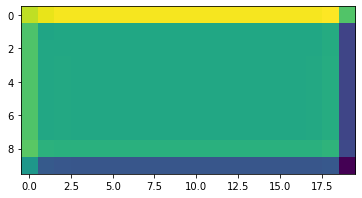

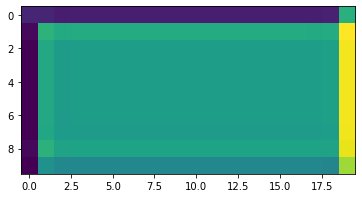

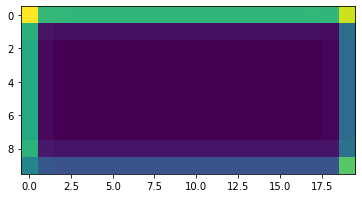

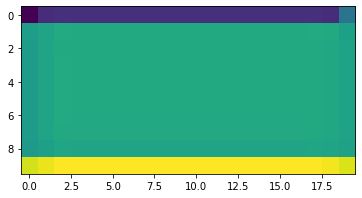

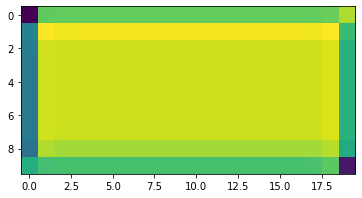

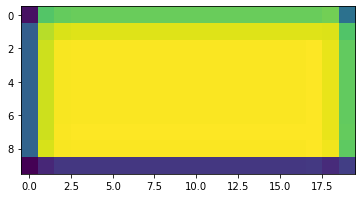

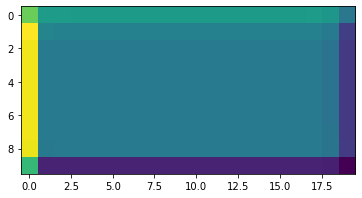

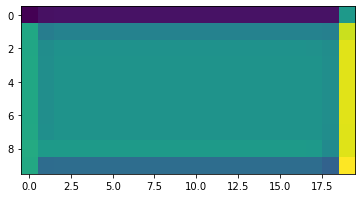

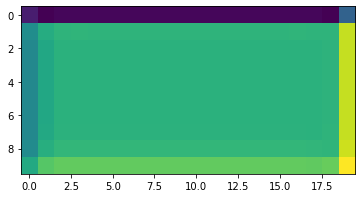

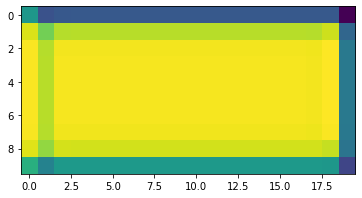

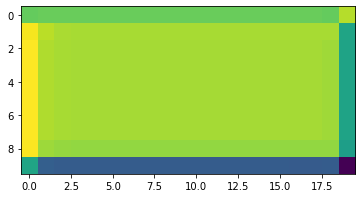

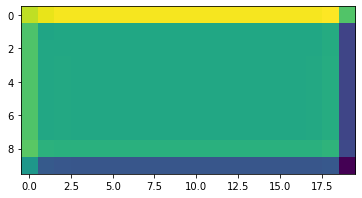

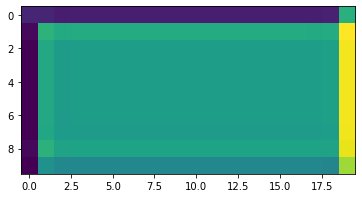

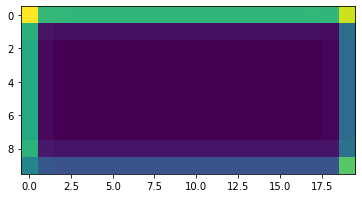

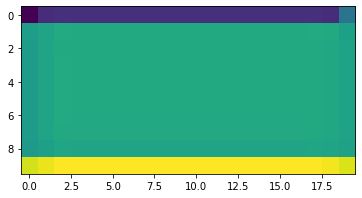

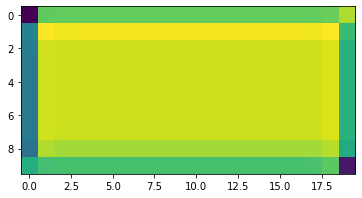

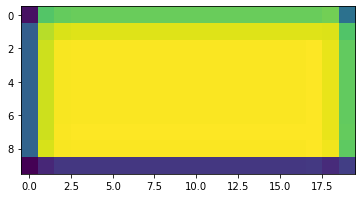

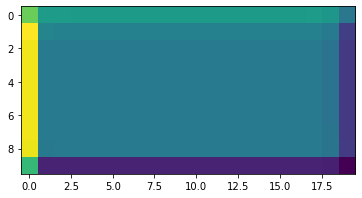

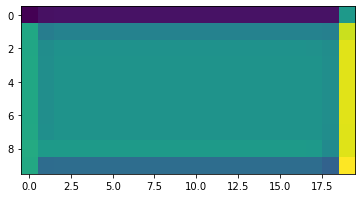

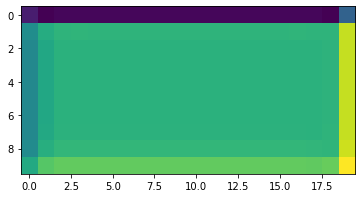

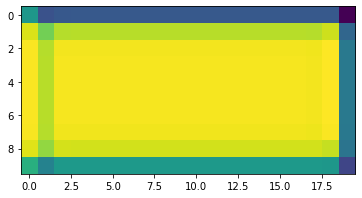

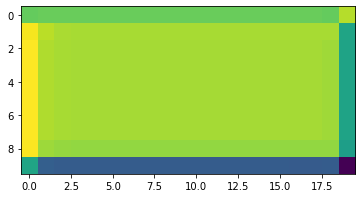

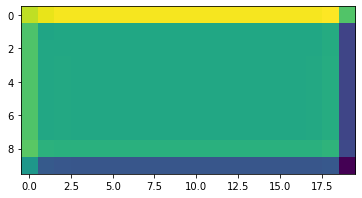

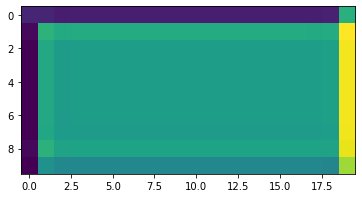

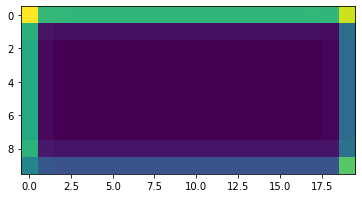

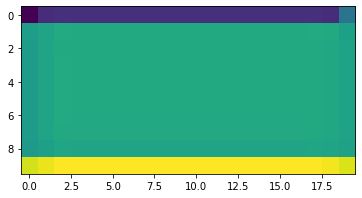

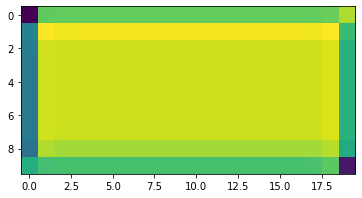

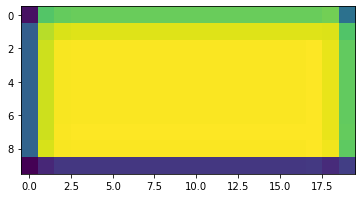

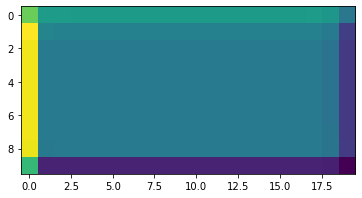

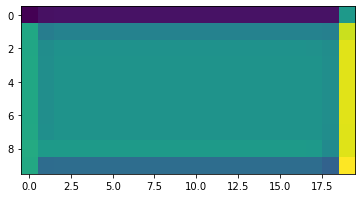

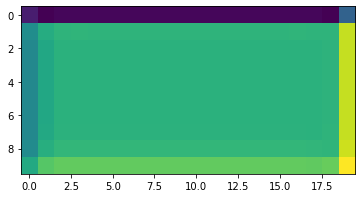

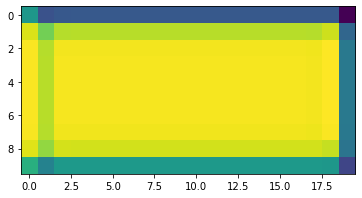

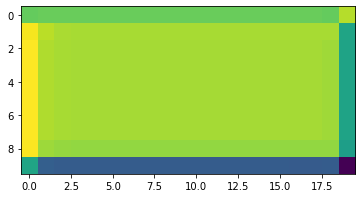

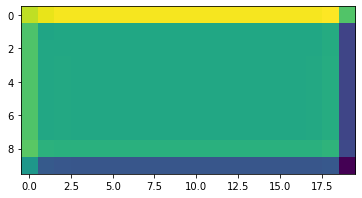

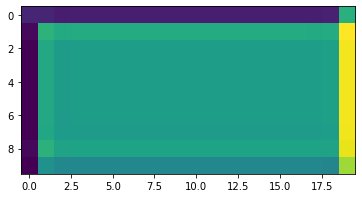

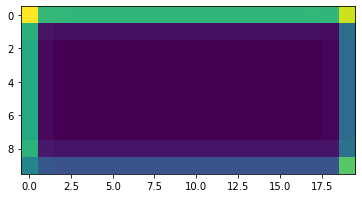

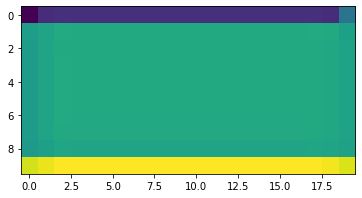

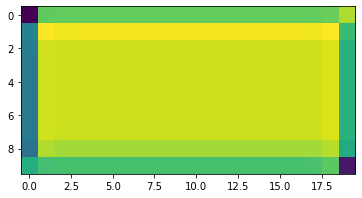

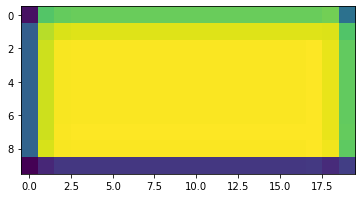

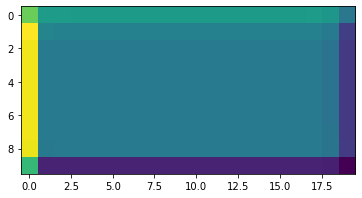

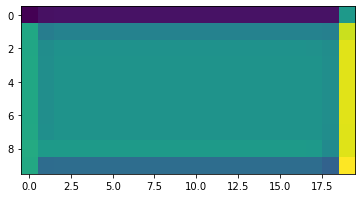

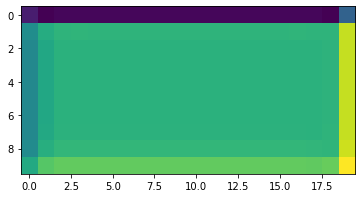

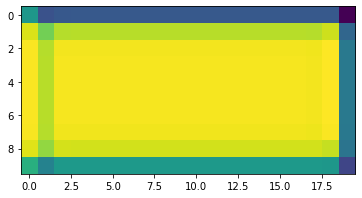

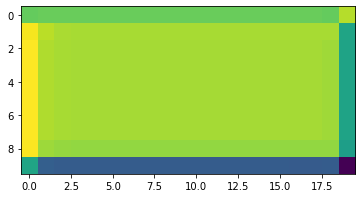

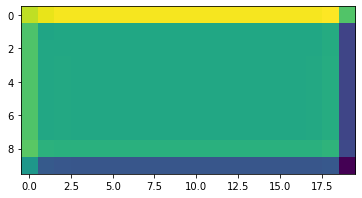

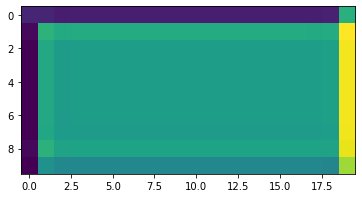

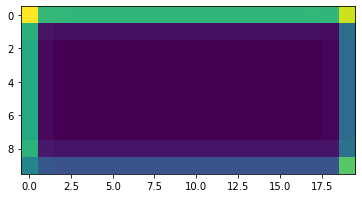

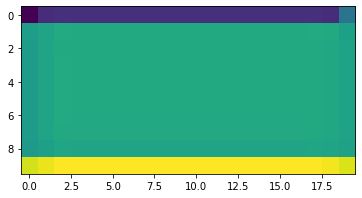

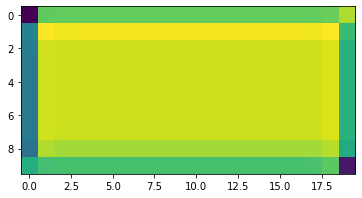

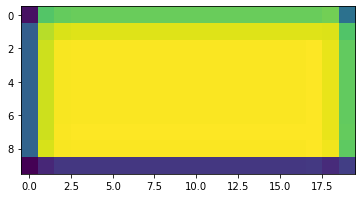

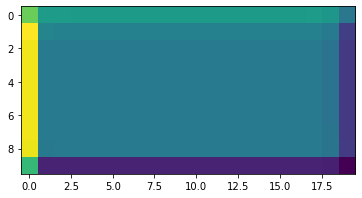

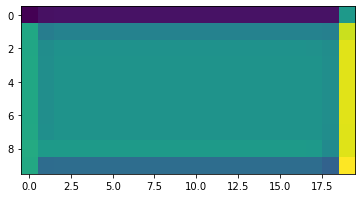

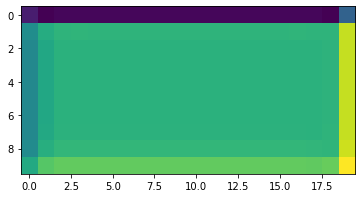

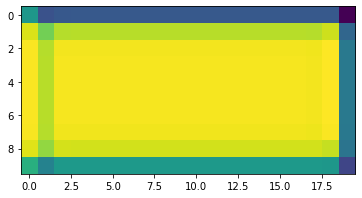

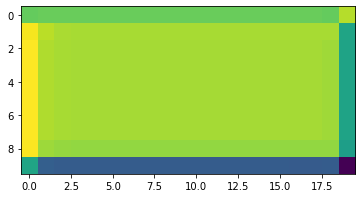

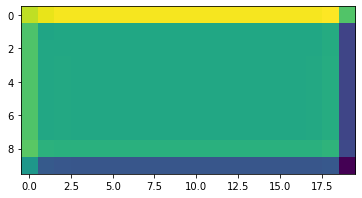

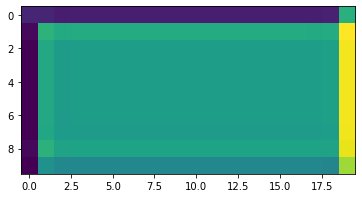

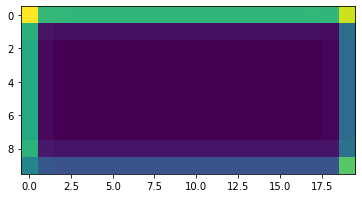

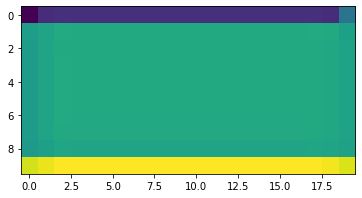

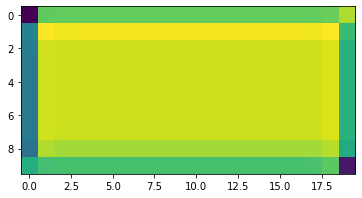

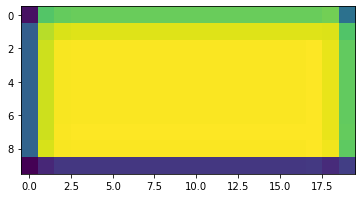

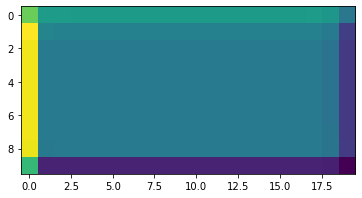

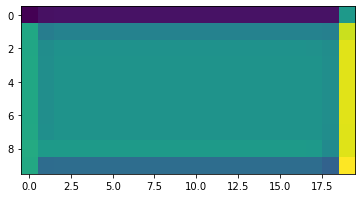

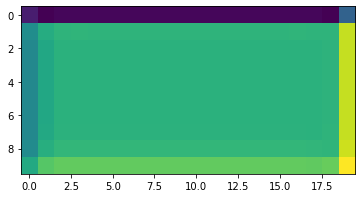

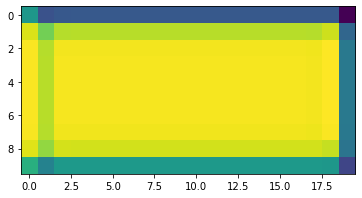

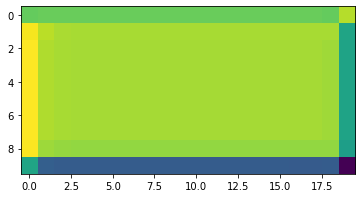

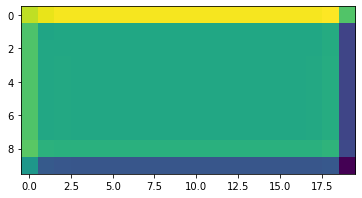

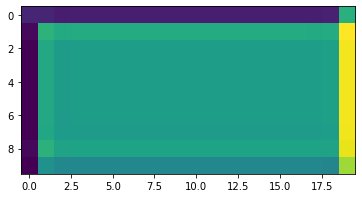

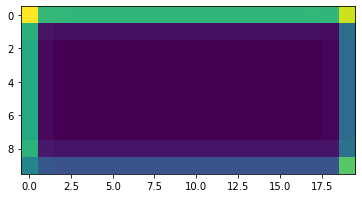

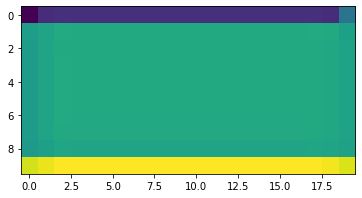

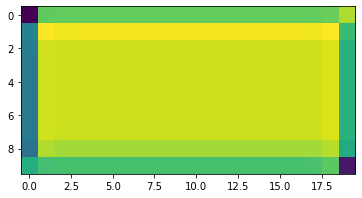

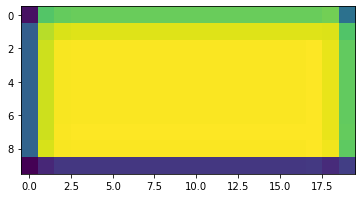

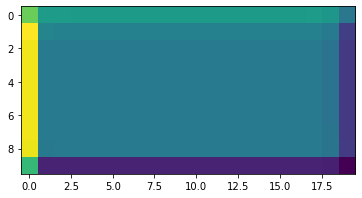

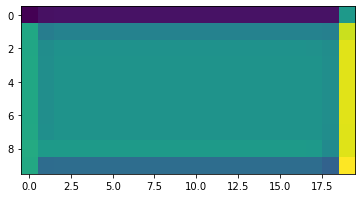

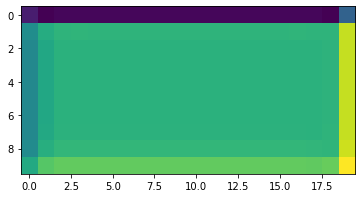

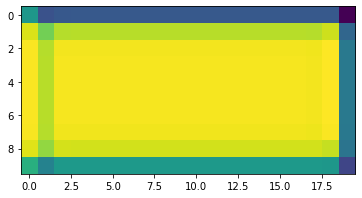

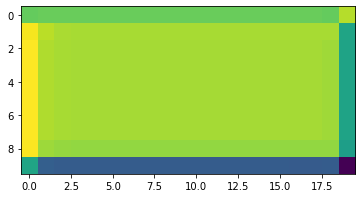

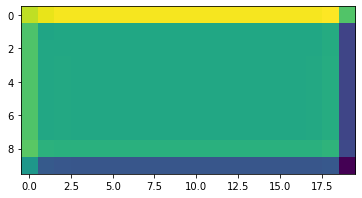

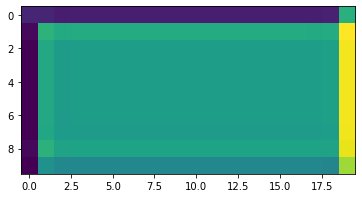

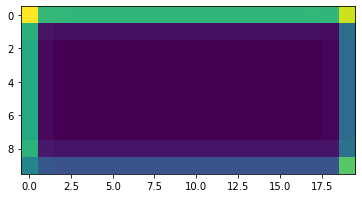

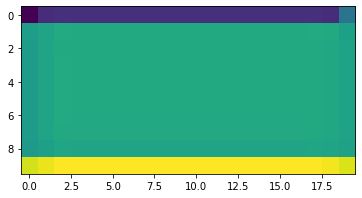

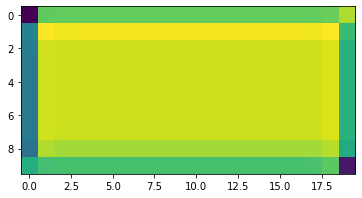

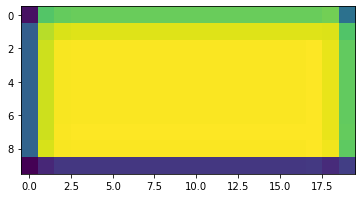

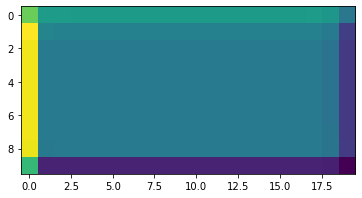

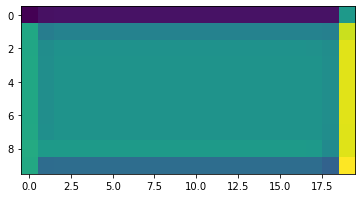

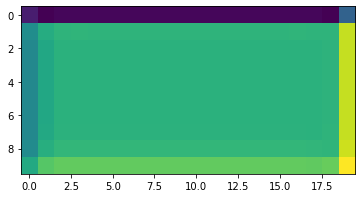

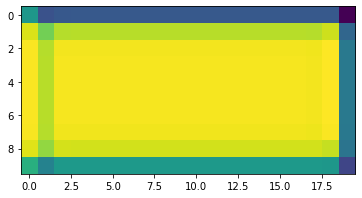

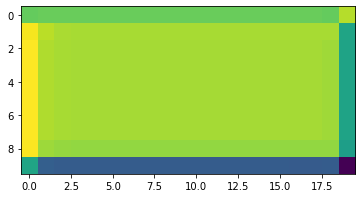

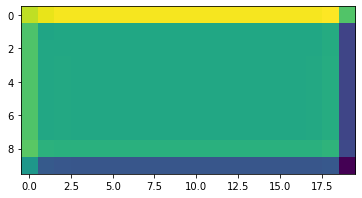

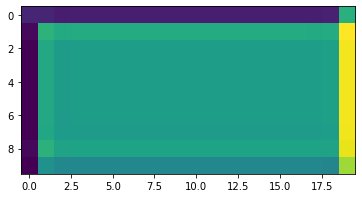

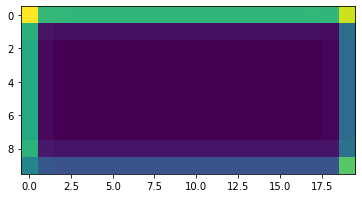

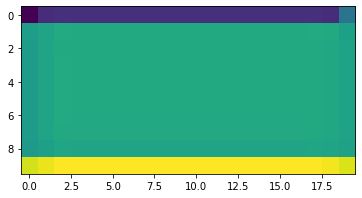

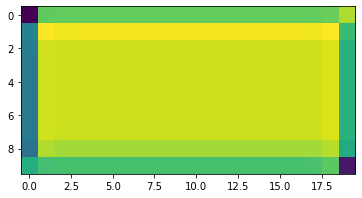

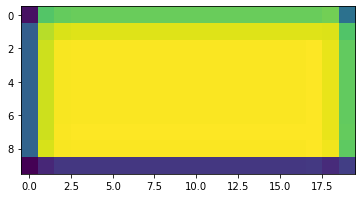

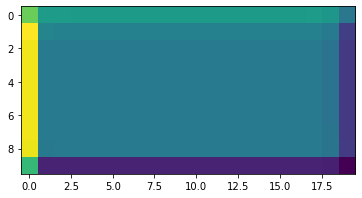

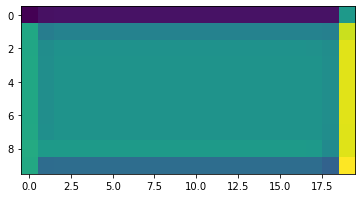

In [44]:
for s in range(output.shape[0]):
    output_s = output[s, :, :, :]
    for i in range(output.shape[1]):
        #print(output[:, i, :, :].shape)
        output_i = output_s[i, :, :]
        pred = np.asarray(output_i.detach().cpu().reshape(output_i.detach().cpu().shape[0],output_i.detach().cpu().shape[1]))
        pred = pred*255
        plt.imshow(pred)
        plt.show()